In [17]:
import pandas as pd
import matplotlib.pyplot as plt

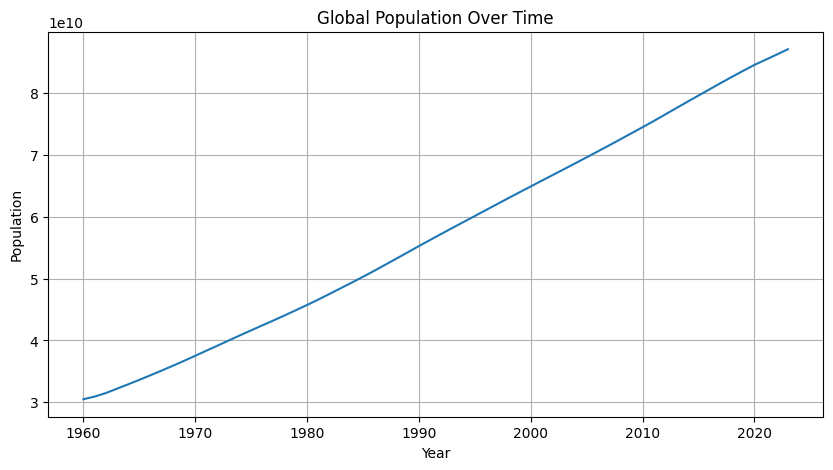

In [18]:
# Load dataset
df = pd.read_csv("population.csv")
# View first 5 rows
df.head()
# Plot global population trend
global_trend = df.groupby("Year")["Value"].sum()
plt.figure(figsize=(10,5))
plt.plot(global_trend.index, global_trend.values)
plt.title("Global Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

2. **Filter Data**


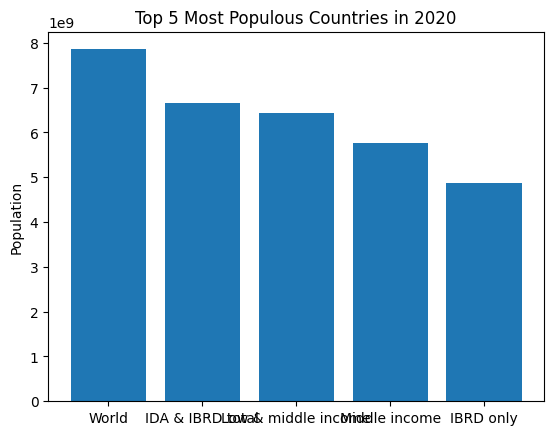

In [19]:
top_countries = df[df["Year"] == 2020].sort_values("Value", ascending=False).head(5)
plt.bar(top_countries["Country Name"], top_countries["Value"])
plt.title("Top 5 Most Populous Countries in 2020")
plt.ylabel("Population")
plt.show()

In [20]:
# Population of Kenya
kenya_2020 = df[(df["Country Name"] == "Kenya") & (df["Year"] == 2020)]
print(kenya_2020)



     Country Name Country Code  Year       Value
7740        Kenya          KEN  2020  52217334.0


In [21]:
# All records for the USA after 2000
usa_recent = df[(df["Country Name"] == "United States") & (df["Year"] > 2000)]
print(usa_recent)


        Country Name Country Code  Year        Value
16011  United States          USA  2001  284968955.0
16012  United States          USA  2002  287625193.0
16013  United States          USA  2003  290107933.0
16014  United States          USA  2004  292805298.0
16015  United States          USA  2005  295516599.0
16016  United States          USA  2006  298379912.0
16017  United States          USA  2007  301231207.0
16018  United States          USA  2008  304093966.0
16019  United States          USA  2009  306771529.0
16020  United States          USA  2010  309327143.0
16021  United States          USA  2011  311583481.0
16022  United States          USA  2012  313877662.0
16023  United States          USA  2013  316059947.0
16024  United States          USA  2014  318386329.0
16025  United States          USA  2015  320738994.0
16026  United States          USA  2016  323071755.0
16027  United States          USA  2017  325122128.0
16028  United States          USA  2018  32683

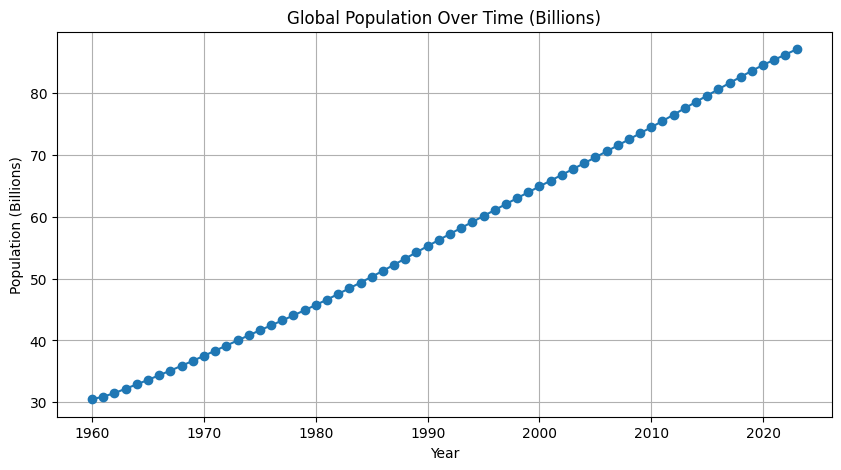

In [22]:
# Total Population per Year Globally
# Sum global population per year

global_trend = df.groupby("Year")["Value"].sum()

# Convert to billions
global_trend_billions = global_trend / 1e9

# Plot
plt.figure(figsize=(10,5))
plt.plot(global_trend_billions.index, global_trend_billions.values, marker='o')
plt.title("Global Population Over Time (Billions)")
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(True)
plt.show()



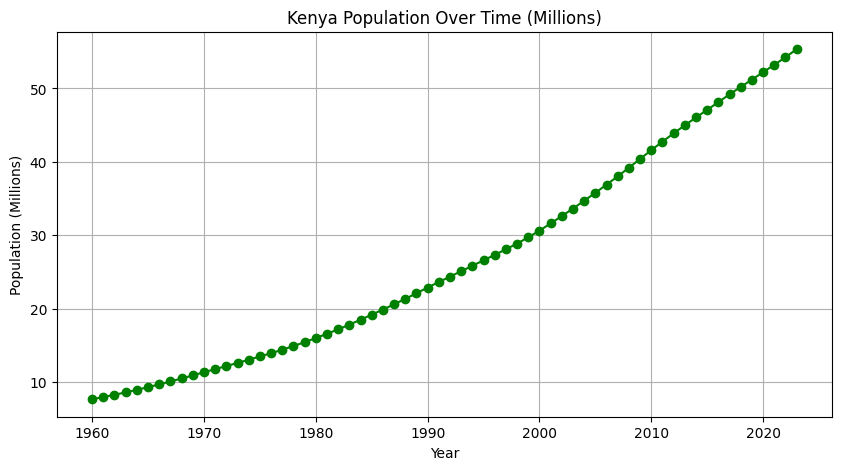

In [23]:
#population treand for Kenya over time

kenya_trend = df[df["Country Name"] == "Kenya"].set_index("Year")["Value"]

# Convert to millions
kenya_trend_millions = kenya_trend / 1e6

# Plot
plt.figure(figsize=(10,5))
plt.plot(kenya_trend_millions.index, kenya_trend_millions.values, marker='o', color='green')
plt.title("Kenya Population Over Time (Millions)")
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(True)
plt.show()



In [24]:
#Population Growth Rate per Country
# Sort by Country and Year

df_sorted = df.sort_values(["Country Name", "Year"])

# Compute annual growth rate (%)
df_sorted["Growth_Rate"] = df_sorted.groupby("Country Name")["Value"].pct_change() * 100

# View Kenya growth rates
kenya_growth = df_sorted[df_sorted["Country Name"] == "Kenya"][["Year", "Growth_Rate"]]
print(kenya_growth.head())


      Year  Growth_Rate
7680  1960          NaN
7681  1961     3.800537
7682  1962     3.900187
7683  1963     3.960125
7684  1964     4.005159


                     Country Name  Population_Millions
16545                       World          8061.876001
6655             IDA & IBRD total          6858.957145
8959          Low & middle income          6633.109634
9983                Middle income          5896.643239
6591                    IBRD only          4952.574126
4031   Early-demographic dividend          3511.076811
8895          Lower middle income          3079.778780
15905         Upper middle income          2816.864459
4095          East Asia & Pacific          2384.463611
9087    Late-demographic dividend          2326.658047


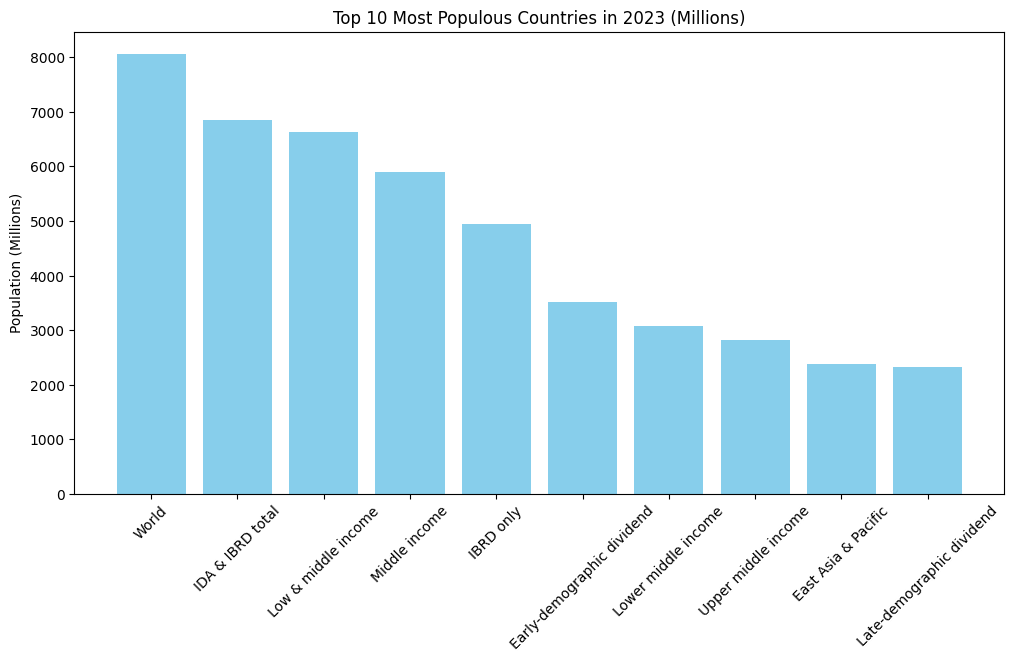

In [25]:

# Find the latest year in the dataset
latest_year = df["Year"].max()

# top 10 most populous countries in the latest year
top_countries = df[df["Year"] == latest_year].sort_values("Value", ascending=False).head(10)

# column for population in millions
top_countries["Population_Millions"] = top_countries["Value"] / 1e6

# Print table
print(top_countries[["Country Name", "Population_Millions"]])

# Plot the top 10 countries
plt.figure(figsize=(12,6))
plt.bar(top_countries["Country Name"], top_countries["Population_Millions"], color='skyblue')
plt.title(f"Top 10 Most Populous Countries in {latest_year} (Millions)")
plt.ylabel("Population (Millions)")
plt.xticks(rotation=45)
plt.show()



In [30]:
# Total global population per year (in billions)
global_trend = df.groupby("Year")["Value"].sum() / 1e9
print(global_trend.head())




Year
1960    30.478265
1961    30.902192
1962    31.473036
1963    32.178376
1964    32.890055
Name: Value, dtype: float64


In [29]:
# Total population by country (all years) in millions
country_totals = df.groupby("Country Name")["Value"].sum() / 1e6
country_totals = country_totals.sort_values(ascending=False)
print(country_totals.head(10))


Country Name
World                         349356.941820
IDA & IBRD total              286554.146600
Low & middle income           272517.173603
Middle income                 249968.564726
IBRD only                     222911.964090
Early-demographic dividend    137886.401618
Upper middle income           132579.523752
Lower middle income           117389.040974
Late-demographic dividend     115680.576147
East Asia & Pacific           115167.150254
Name: Value, dtype: float64


In [28]:
# Average population per continent per year (millions)
if "Continent" in df.columns:
    continent_avg = df.groupby(["Continent", "Year"])["Value"].mean() / 1e6
    print(continent_avg.head(10))
else:
    print("No 'Continent' column found in the dataset.")

No 'Continent' column found in the dataset.
